In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df

,new_id,max_date,defaut,Nbre_rejection_3M,Somme_Reject,Temps_écoulé,Mont_tot_sur_3M,SOLDE
0,1777-1,2023-10-11 22:00:00,0,0,0.0,999,2973.05,-12216.94
1,1778-2,2024-03-03 23:00:00,0,0,0.0,999,2326.21,-10063.39
2,1778-1,2022-12-08 23:00:00,0,0,0.0,999,780.52,-17851.50
3,1780-3,2024-03-03 23:00:00,0,0,0.0,999,1365.91,-5479.68
4,1780-2,2022-12-06 23:00:00,0,0,0.0,999,683.57,-9737.07
...,...,...,...,...,...,...,...,...
3979,66054-1,2024-03-03 23:00:00,0,0,0.0,999,0.00,50.00
3980,66786-1,2024-02-25 23:00:00,0,0,0.0,999,154.47,29.39
3981,66855-1,2024-02-29 23:00:00,0,0,0.0,999,0.00,0.00
3982,67332-1,2024-02-26 23:00:00,0,0,0.0,999,2372.48,2400.54


In [4]:
X = df.drop(['defaut',"max_date","new_id"], axis=1)  
y = df['defaut']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LogisticRegression

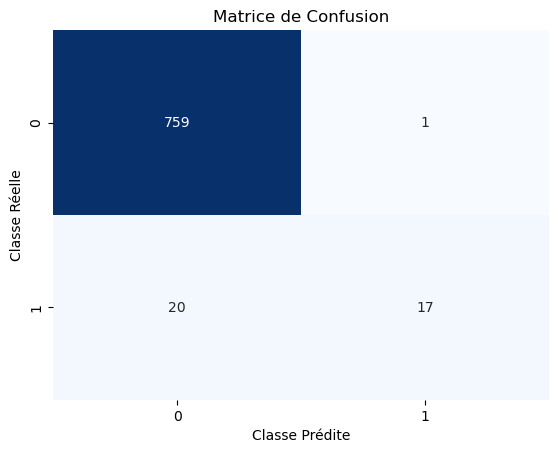

Accuracy: 0.973651191969887
Précision: 0.9444444444444444
Rappel: 0.4594594594594595
Score F1: 0.6181818181818182


In [6]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)

# Prédictions 
predictions = model.predict(X_test)

# matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion')
plt.show()

# Performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)



print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)

Accuracy: 0.9749058971141782
Detailed classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       760
           1       0.87      0.54      0.67        37

    accuracy                           0.97       797
   macro avg       0.92      0.77      0.83       797
weighted avg       0.97      0.97      0.97       797



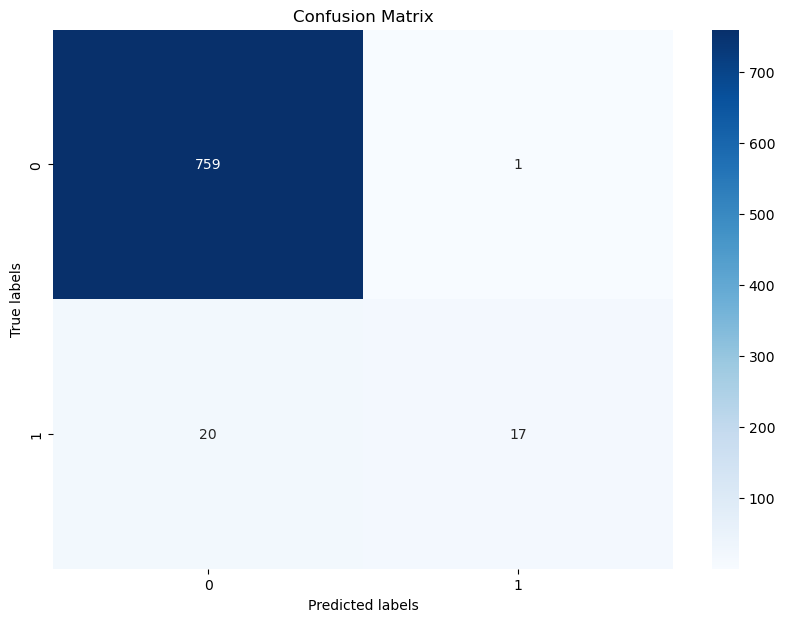

In [7]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)


predictions = clf.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Detailed classification report:")
print(classification_report(y_test, predictions))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Exactitude Globale
**Accuracy**: 0.9749 (97.49%)
- Cela signifie que le modèle a correctement prédit les étiquettes pour 97.49% des instances dans l'ensemble de test. C'est une mesure de la performance globale du modèle sur toutes les classes.

## Rapport de Classification Détail

### Classe 0 (la classe majoritaire)
- **Precision**: 0.98 - Pour toutes les instances où le modèle a prédit la classe 0, 98% étaient réellement de la classe 0.
- **Recall**: 1.00 - Le modèle a correctement identifié 100% des instances réelles de la classe 0.
- **F1-Score**: 0.99 - Une mesure qui combine la précision et le rappel; un score parfait pour la classe 0.
- **Support**: 760 - Le nombre d'instances réelles de la classe 0 dans l'ensemble de test.

### Classe 1 (la classe minoritaire)
- **Precision**: 0.87 - Pour toutes les instances où le modèle a prédit la classe 1, 87% étaient réellement de la classe 1.
- **Recall**: 0.54 - Le modèle a correctement identifié 54% des instances réelles de la classe 1.
- **F1-Score**: 0.67 - Ce score est considérablement plus bas que celui de la classe 0, indiquant une performance moindre pour la classe minoritaire.
- **Support**: 37 - Le nombre d'instances réelles de la classe 1 dans l'ensemble de test.

## Moyennes

### Macro avg (Moyenne Macro)
- **Precision**: 0.92
- **Recall**: 0.77
- **F1-Score**: 0.83
- Ces valeurs sont des moyennes non pondérées des métriques pour chaque classe. Elles donnent une idée de la performance du modèle sans prendre en compte l'effectif des classes, montrant une faiblesse dans le rappel.

### Weighted avg (Moyenne Pondérée)
- **Precision**: 0.97
- **Recall**: 0.97
- **F1-Score**: 0.97
- Ces valeurs sont des moyennes pondérées par le nombre d'instances dans chaque classe, donc plus influencées par la classe majoritaire.

## Implications
- Le modèle performe exceptionnellement bien sur la classe majoritaire mais montre des lacunes en termes de rappel pour la classe minoritaire. Cela pourrait être un problème si la classe minoritaire est critique.


In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage 
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Accuracy: 0.9761606022584692
Recall: 0.5945945945945946
Precision: 0.8461538461538461
F1 Score: 0.6984126984126984


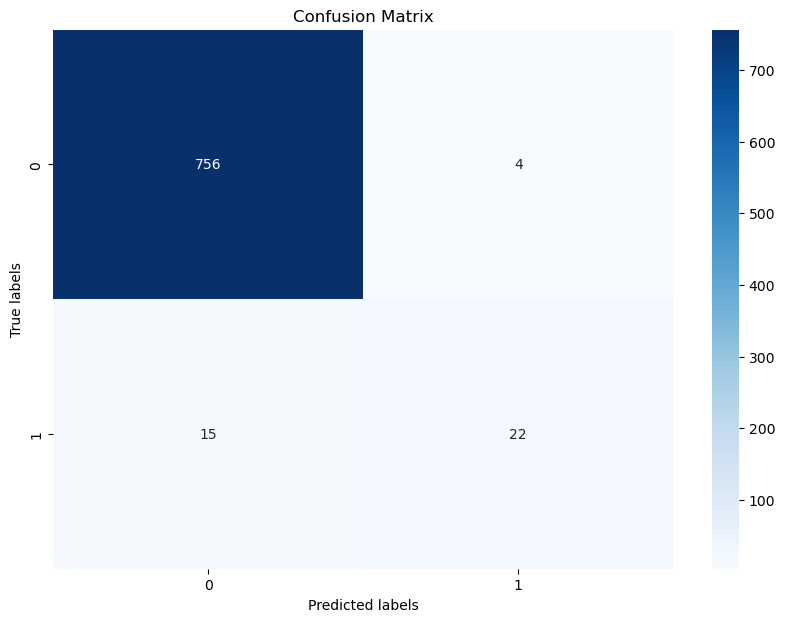

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### XGBoost

In [10]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

print(f"F1 Score: {f1}")

Accuracy: 0.9761606022584692
Precision: 0.9090909090909091
Recall: 0.5405405405405406
F1 Score: 0.6779661016949152


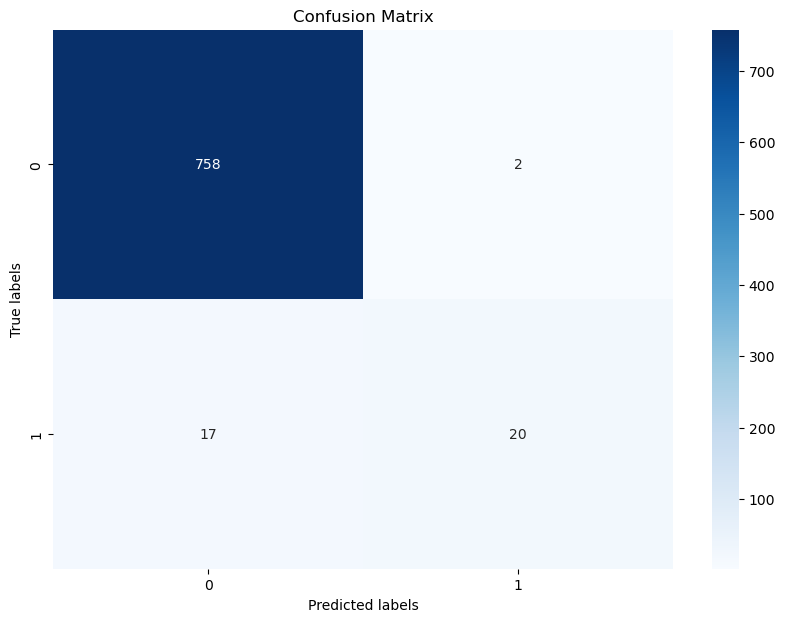

In [11]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

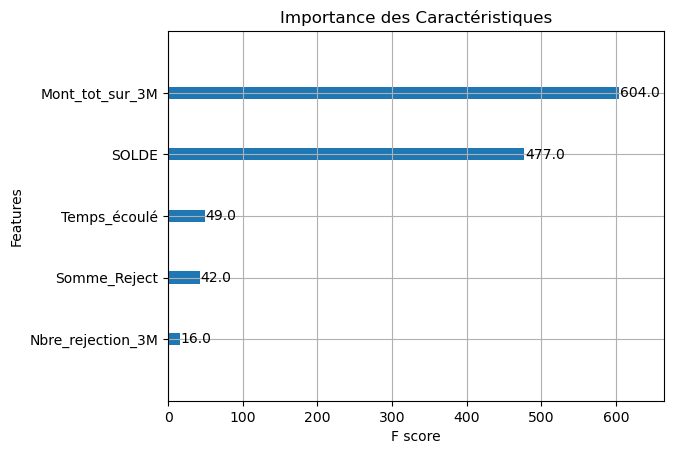

In [12]:
xgb.plot_importance(model)
plt.title('Importance des Caractéristiques')
plt.show()

Les valeurs sur l'axe horizontal, appelées "F score", sont des mesures de l'importance des caractéristiques. Elles sont déterminées par le nombre de fois où chaque caractéristique est utilisée pour diviser les données au sein des arbres construits pendant l'apprentissage du modèle.

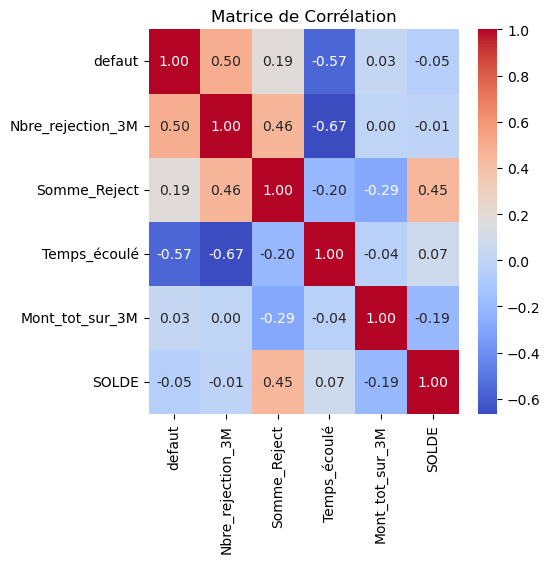

In [13]:
data = df.drop(["max_date","new_id"], axis=1)  
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()


plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

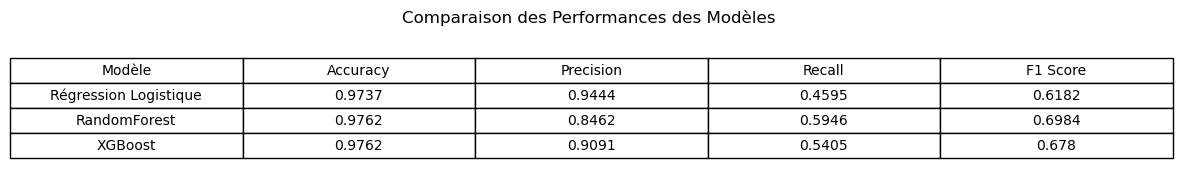

In [14]:
# Création d'un DataFrame avec les performances
d = {
    'Modèle': ['Régression Logistique', 'RandomForest', 'XGBoost'],
    'Accuracy': [0.9737, 0.9762, 0.9762],
    'Precision': [0.9444, 0.8462, 0.9091],
    'Recall': [0.4595, 0.5946, 0.5405],
    'F1 Score': [0.6182, 0.6984, 0.6780]
}

df = pd.DataFrame(d)


fig, ax = plt.subplots(figsize=(10,2))  
ax.axis('tight')
ax.axis('off')


table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.scale(1.5, 1.5) 

plt.title("Comparaison des Performances des Modèles ")
plt.show()